#### Sources
- https://cs231n.github.io/classification/
- https://www.youtube.com/watch?v=t2IwlUtbCFE&list=PL16j5WbGpaM0_Tj8CRmurZ8Kk1gEBc7fg&index=2
- https://www.cs.toronto.edu/~kriz/cifar.html

In [54]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [3]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [44]:
cifar_data_1 = unpickle('cifar-10-python/data_batch_1')
cifar_data_2 = unpickle('cifar-10-python/data_batch_2')
cifar_data_3 = unpickle('cifar-10-python/data_batch_3')
cifar_data_4 = unpickle('cifar-10-python/data_batch_4')
cifar_data_5 = unpickle('cifar-10-python/data_batch_5')

In [306]:
Xtr = np.concatenate([cifar_data_1[b'data'], cifar_data_2[b'data'], cifar_data_3[b'data'], cifar_data_4[b'data']])
ytr = np.concatenate([cifar_data_1[b'labels'], cifar_data_2[b'labels'], cifar_data_3[b'labels'], cifar_data_4[b'labels']])
Xtst = cifar_data_5[b'data']
ytst = cifar_data_5[b'labels']

Xtr_norm = Xtr - Xtr.mean(axis=0)
Xtst_norm = Xtst - Xtst.mean(axis=0)

In [50]:
def eval(ypred, ytst):
    return np.sum(np.equal(ypred, ytst)) / ypred.shape[0]

### Nearest Neighbor Classification using L1 Distance

distance metric: d(I1, I2) = $\Sigma$|I$_{1}$$^{p}$ - I$_{2}$$^{p}$|

In [71]:
class L1NN(object):
    def __init__(self):
        pass

    def train(self, X, y):
        self.Xtr = X
        self.ytr = np.array(y)

    def predict(self, X):
        num_test = X.shape[0]
        Ypred = np.zeros(num_test, dtype = self.ytr.dtype)

        for i in range(num_test):
            distances = np.sum(np.abs(self.Xtr - X[i, :]), axis=1)
            min_index = np.argmin(distances) 
            Ypred[i] = self.ytr[min_index]

        return Ypred

In [76]:
class L2NN(object):
    def __init__(self):
        pass

    def train(self, X, y):
        self.Xtr = X
        self.ytr = np.array(y)

    def predict(self, X):
        num_test = X.shape[0]
        Ypred = np.zeros(num_test, dtype = self.ytr.dtype)

        for i in range(num_test):
            distances = np.sum(np.square(self.Xtr - X[i, :]), axis=1)
            min_index = np.argmin(distances) 
            Ypred[i] = self.ytr[min_index]

        return Ypred

In [99]:
l1nn = L1NN()
l2nn = L2NN()

In [100]:
l1nn.train(Xtr, ytr)
l2nn.train(Xtr, ytr)

In [339]:
#l1nn accuracy
sample_idxs = np.random.choice(np.arange(Xtst.shape[0]), size=100)
Xtst_sample = Xtst[sample_idxs, :]
ytst_sample = np.array(ytst)[sample_idxs]
l1nn_ypred_sample = l1nn.predict(Xtst_sample)
l2nn_ypred_sample = l2nn.predict(Xtst_sample)

#print('l1nn accuracy:', eval(l1nn_ypred_sample, ytst_sample))
#print('l2nn accuracy:', eval(l2nn_ypred_sample, ytst_sample))

KeyboardInterrupt: 

#### K Nearest Neighbors

In [168]:
class KNN(object):
    def __init__(self):
        pass

    def train(self, X, y):
        self.Xtr = X
        self.ytr = np.array(y)

    def predict(self, X, k):
        num_test = X.shape[0]
        Ypred = np.zeros(num_test, dtype = self.ytr.dtype)

        for i in range(num_test):
            knn_idxs = np.argpartition(np.sum(np.abs(self.Xtr - X[i, :]), axis=1), kth=k)[:k]
            knn_labels = self.ytr[knn_idxs]
            values, counts = np.unique(knn_labels, return_counts=True)
            Ypred[i] = values[np.argmax(counts)]

        return Ypred

In [169]:
knn = KNN()

In [170]:
knn.train(Xtr, ytr)

In [182]:
sample_idxs = np.random.choice(np.arange(Xtst.shape[0]), size=100)
Xtst_sample = Xtst[sample_idxs, :]
ytst_sample = np.array(ytst)[sample_idxs]
#l1nn_ypred_sample = l1nn.predict(Xtst_sample)
#l2nn_ypred_sample = l2nn.predict(Xtst_sample)
#l2nn_ypred_sample = knn.predict(Xtst_sample)

#print('l1nn accuracy:', eval(l1nn_ypred_sample, ytst_sample))
#print('l2nn accuracy:', eval(l2nn_ypred_sample, ytst_sample))
#print('knn accuracy:', eval(knn_ypred_sample, ytst_sample))

In [184]:
#k-fold hyperparam tuning on knn
accuracies = []
k_options = [1, 3, 5, 10, 20, 50]
for k in k_options:
    knn_ypred_sample = knn.predict(Xtst_sample, k)
    acc = eval(knn_ypred_sample, ytst_sample)
    print(f'accuracy at k = {k}:', acc)
    accuracies.append(acc)

accuracy at k = 1: 0.23
accuracy at k = 3: 0.21
accuracy at k = 5: 0.26
accuracy at k = 10: 0.21
accuracy at k = 20: 0.23
accuracy at k = 50: 0.23


In [185]:
accuracies

[np.float64(0.23),
 np.float64(0.21),
 np.float64(0.26),
 np.float64(0.21),
 np.float64(0.23),
 np.float64(0.23)]

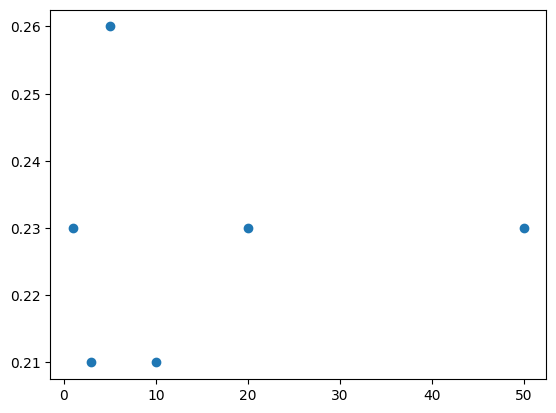

In [186]:
plt.scatter(k_options, accuracies)

## Linear Classification

In [334]:
#implement linear classifier
class LinearClassifier:
    def __init__(self, D, K):
        self.W = np.random.normal(size=(D, K))
        self.b = np.random.normal(K)

    def forward(self, X):
        return X @ self.W  + self.b
   
    def loss(self, y_pred, y_true, delta, lmbda):
        '''
        y_pred = matrix of shape (N x K)
        y_true = vector of dim N
        delta = scalar
        lmbda = scalar
        '''
        yt_pred = y_pred[np.arange(len(y_true)), y_true]
        
        #use loss mask to remove the correct y trues from loss calculation
        yt_loss_mask = np.ones(y_pred.shape)
        yt_loss_mask[np.arange(yt_loss_mask.shape[0]), y_true] = 0

        dist = (y_pred.T - yt_pred + delta).T * yt_loss_mask
        l2_reg = lmbda * np.sum(self.W ** 2)
        loss = np.sum(np.clip(dist, a_min=0, a_max=np.inf)) + l2_reg

        return loss, dist

In [335]:
#implement multi-class SVM loss with L2 regularization
lc = LinearClassifier(3072, 10)

In [336]:
y_pred = lc.forward(Xtr_norm)

In [338]:
lc.loss(y_pred, ytr, 10, 0.1)

np.float64(3076.854318885039)

#### Softmax Classifier

loss function:
L$_{i}$ = -f$_{yi}$ + log$\Sigma$e$^{fj}$

In [388]:
class SoftmaxClassifier:
    def __init__(self, D, K):
        self.W = np.random.normal(size=(D, K)) / D ** 0.5
        self.b = np.random.normal(K)

    def forward(self, X):
        return X @ self.W  + self.b

    def loss(self, y_pred, y_true, lmbda):
        #compute softmax
        y_pred -= np.max(y_pred, axis=0) #reduce by max(y_pred) for numerical stability
        y_pred = np.exp(y_pred)
        y_pred /= np.sum(y_pred, axis=0)

        l2_reg = lmbda * np.sum(self.W ** 2)
        loss = -np.mean(y_pred[np.arange(y_pred.shape[0]), y_true]) + l2_reg
        return loss
        

In [389]:
sc = SoftmaxClassifier(3072, 10)

In [390]:
y_pred = sc.forward(Xtr_norm)

In [391]:
sc.loss(y_pred, ytr, 0.1)

np.float64(0.993988779960793)